In [51]:
import ELM

import numpy as np
import matplotlib.pyplot as plt

from KalmanFilter import KalmanFilter
from DeepKalmanFilter import DeepKalmanFilter
from toy_examples import gen_lin_toy_example, gen_nlin_toy_example

In [49]:
#visualisation tool
def visualize_trajectory(a_test, y_test, a_pred, P_pred, trajectory_ID, conf_display = False):
    N, K, D = a_test.shape
    num_state = np.arange(K)
    plt.figure()
    plt.plot(num_state, a_test[trajectory_ID], color='blue', label='true state')
    plt.plot(num_state, a_pred[trajectory_ID], color='green', label='estimated state')
    
    if conf_display:
        kwargs = {'color': 'r', 'linewidth': 0.5, 'linestyle': '--'}
        plt.plot(num_state, np.ravel(a_pred[trajectory_ID]) - np.sqrt(np.ravel(P_pred[trajectory_ID])), **kwargs)
        plt.plot(num_state, np.ravel(a_pred[trajectory_ID]) + np.sqrt(np.ravel(P_pred[trajectory_ID])), **kwargs)
        plt.plot([], [], label = '68% confidence interval', **kwargs)
    
    plt.scatter(num_state, y_test[trajectory_ID], marker='*', color='red', label='observation')
    plt.xlabel('time')
    plt.ylabel('state')
    
    plt.legend()
    plt.show()

In [4]:
#Simulation parameters
##Number of trajectories
N_train = 500
N_test = 50

##Size of a trajectory
K_train = 10
K_test = 50

# First experiment :

100%|██████████| 49/49 [00:00<00:00, 2075.99it/s]


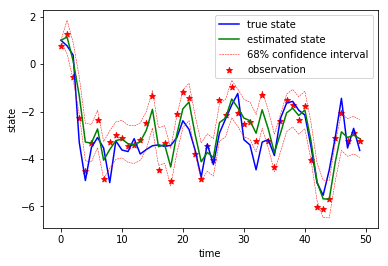

In [42]:
#LINEAR MODEL
D_1 = 1
H_1 = 1

##Initial state assumption
a_0_train = np.ones((N_train, D_1))
a_0_test = np.ones((N_test, D_1))
P_0_test = np.cov(a_0_test, rowvar=False)
#Transition Model
##From states to states

F = np.identity(D_1)
Q = np.identity(D_1)

##From states to observations
G = np.ones((H_1, D_1))
R = np.identity(H_1)


A_lin_train, Y_lin_train = gen_lin_toy_example(a_0=a_0_train,
                                               K=K_train,
                                               F=F,
                                               Q=Q,
                                               G=G,
                                               R=R)
a_lin_train = A_lin_train[:,:-1,:].reshape(N_train*(K_train - 1), D_1)
b_lin_train = A_lin_train[:,1:,:].reshape(N_train*(K_train - 1), D_1)
A_lin_train = A_lin_train.reshape(N_train*K_train, D_1)
Y_lin_train = Y_lin_train.reshape(N_train*K_train, H_1)

#Training
params_path = 'coucou'
verbose = False
lmbda = 1e-2
kalman_filter_lin = KalmanFilter(params_path=params_path, verbose=verbose)
kalman_filter_lin.fit(A=A_lin_train,
                      a=a_lin_train,
                      b=b_lin_train,
                      Y=Y_lin_train,
                      lmbda=lmbda)

A_lin_test, Y_lin_test = gen_lin_toy_example(a_0=a_0_test,
                                             K=K_test,
                                             F=F,
                                             Q=Q,
                                             G=G,
                                             R=R)

A_lin_pred, P_lin_pred = kalman_filter_lin.predict(Y=Y_lin_test,
                                                   a_0=a_0_test,
                                                   P_0=P_0_test)

visualize_trajectory(A_lin_test, Y_lin_test, A_lin_pred, P_lin_pred, 2, conf_display = True)

100%|██████████| 49/49 [00:00<00:00, 2161.69it/s]


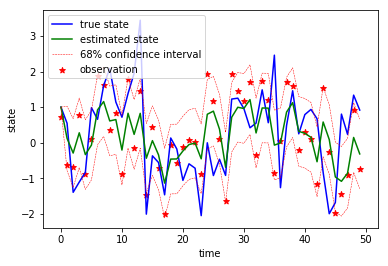

--TRAIN PARAMS--
a_nlin_train.shape (5000, 1)
y_nlin_train.shape (5000, 1) 

--TEST PARAMS--
a_nlin_test.shape (50, 50, 1)
y_nlin_test.shape (50, 50, 1) 



In [47]:
#NON LINEAR MODEL
A_nlin_train, Y_nlin_train = gen_nlin_toy_example(a_0=a_0_train,
                                                  K=K_train)
A_nlin_test, Y_nlin_test = gen_nlin_toy_example(a_0=a_0_test,
                                                K=K_test)

a_nlin_train = A_nlin_train[:,:-1,:].reshape(N_train*(K_train - 1), 1)
b_nlin_train = A_nlin_train[:,1:,:].reshape(N_train*(K_train - 1), 1)
A_nlin_train = A_nlin_train.reshape(N_train*K_train, 1)
Y_nlin_train = Y_nlin_train.reshape(N_train*K_train, 1)

#Training
params_path = 'coucou'
verbose = False
lmbda = 1e-2
kalman_filter_lin = KalmanFilter(params_path=params_path, verbose=verbose)
kalman_filter_lin.fit(A=A_nlin_train,
                      a=a_nlin_train,
                      b=b_nlin_train,
                      Y=Y_nlin_train,
                      lmbda=lmbda)

A_nlin_pred, P_nlin_pred = kalman_filter_lin.predict(Y=Y_nlin_test,
                                                     a_0=a_0_test,
                                                     P_0=P_0_test)

visualize_trajectory(A_nlin_test, Y_nlin_test, A_nlin_pred, P_nlin_pred, 1, conf_display = True)
                                                

print('--TRAIN PARAMS--')
print('a_nlin_train.shape', A_nlin_train.shape)
print('y_nlin_train.shape', Y_nlin_train.shape, '\n')

print('--TEST PARAMS--')
print('a_nlin_test.shape', A_nlin_test.shape)
print('y_nlin_test.shape', Y_nlin_test.shape, '\n')

# Linear Kalman Filters

In [45]:
#Meta Data
params_path='coucou'
verbose = True

In [46]:
#Initial state
a_0 = np.zeros((N_test, D))
P_0 = np.identity(D)
lmbda = 1e-3

In [47]:


print('\n')
kalman_filter_nlin = KalmanFilter(params_path=params_path, verbose=verbose)
kalman_filter_nlin.fit(A=a_nlin_train, Y=y_nlin_train, lmbda=lmbda )

MemoryError: 

In [38]:


a_nlin_pred, P_nlin_pred = kalman_filter_nlin.predict(Y=y_nlin_test,
                                                      a_0=a_0,
                                                      P_0=P_0)


100%|██████████| 499/499 [00:00<00:00, 3712.46it/s]


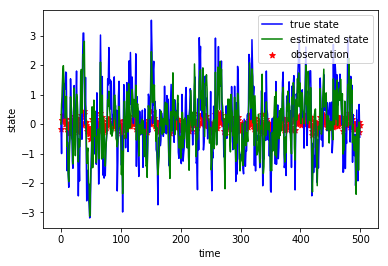

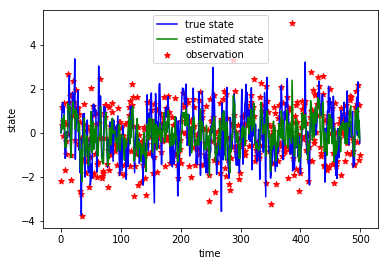

In [39]:
visualize_trajectory(a_lin_test, y_lin_test, a_lin_pred, P_lin_pred, 0, conf_display = False)
visualize_trajectory(a_nlin_test, y_nlin_test, a_nlin_pred, P_nlin_pred, 0, conf_display = False)

# Deep Kalman filters

In [56]:
#Initial state
D = 1
H = 1
L = 1

N_train = 100
K_train = 500

N_test = 1
K_test = 40

a_0_train = np.zeros((N_train, D))
a_0_test = np.zeros((N_test, D))
P_0 = np.identity(D)
lmbda = 100

#LINEAR MODEL
#Transition Model
##From states to states
F = 0.5*np.identity(D)
Q = 1*np.identity(D)

##From states to observations
G = np.zeros((H,D))
np.fill_diagonal(G, 0.3)
R = np.identity(H)*0.1


a_lin_train, y_lin_train = gen_lin_toy_example(a_0=a_0_train,
                                               K=K_train,
                                               F=F,
                                               Q=Q,
                                               G=G,
                                               R=R)

a_lin_test, y_lin_test = gen_lin_toy_example(a_0=a_0_test,
                                             K=K_test,
                                             F=F,
                                             Q=Q,
                                             G=G,
                                             R=R)

a_nlin_train, y_nlin_train = gen_nlin_toy_example(a_0=a_0_train,
                                                  K=K_train)

a_nlin_test, y_nlin_test = gen_nlin_toy_example(a_0=a_0_test,
                                                K=K_test)


In [57]:
#Parameters to train the transition from state to state
STS_feature_sampling = ELM.normal_features
STS_sampling_dim = (D, L)
STS_sampling_params = [0,1/L]
STS_activation = np.tanh
STS_d_activation = lambda X : 1 - np.square(np.tanh(X))
STS_verbose = False

STS_transition_net = (STS_feature_sampling,
                      STS_sampling_dim,
                      STS_sampling_params,
                      STS_activation,
                      STS_d_activation,
                      STS_verbose
                     )

#Parameters to train the transition from state to observation
STO_feature_sampling = ELM.normal_features
STO_sampling_dim = (D, L)
STO_sampling_params = [0,1/L]
STO_activation = np.tanh 
STO_d_activation = lambda X : 1 - np.square(np.tanh(X))
STO_verbose = False
STO_transition_net = (STO_feature_sampling,
                      STO_sampling_dim,
                      STO_sampling_params,
                      STO_activation,
                      STO_d_activation,
                      STO_verbose)

100%|██████████| 39/39 [00:00<00:00, 696.41it/s]


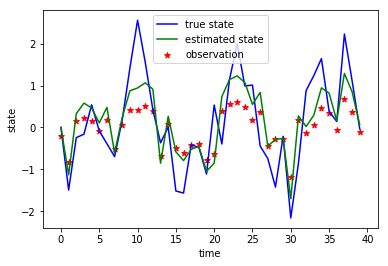

In [58]:
deep_kalman_filter_lin = DeepKalmanFilter(params_path=params_path,
                                          STS_transition_net=STS_transition_net,
                                          STO_transition_net=STO_transition_net,
                                          verbose=False)

deep_kalman_filter_lin.fit(A=a_lin_train, Y=y_lin_train, lmbda=lmbda)
a_lin_pred, P_lin_pred = deep_kalman_filter_lin.predict(Y=y_lin_test, a_0=np.zeros((N_test,D)), P_0=np.tile(A=np.identity(D)[np.newaxis,: , :], reps=(N_test,1,1)))
visualize_trajectory(a_lin_test, y_lin_test, a_lin_pred, P_lin_pred, 0)

100%|██████████| 39/39 [00:00<00:00, 821.59it/s]


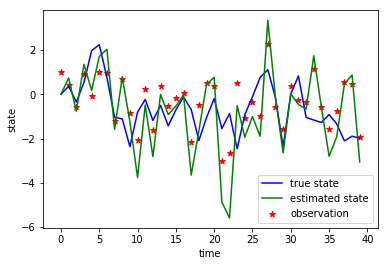

In [14]:
deep_kalman_filter_nlin = DeepKalmanFilter(params_path=params_path,
                                          STS_transition_net=STS_transition_net,
                                          STO_transition_net=STO_transition_net,
                                          verbose=False)

deep_kalman_filter_nlin.fit(A=a_nlin_train, Y=y_nlin_train, lmbda=lmbda)
a_nlin_pred, P_nlin_pred = deep_kalman_filter_lin.predict(Y=y_nlin_test, a_0=np.zeros((N_test,D)), P_0=np.tile(A=np.identity(D)[np.newaxis,: , :], reps=(N_test,1,1)))
visualize_trajectory(a_nlin_test, y_nlin_test, a_nlin_pred, P_nlin_pred, 0, conf_display = False)

In [15]:
A = np.ones((2,3,3))
A[1,1] = 2
print(A)
B = np.tile(A = np.identity(3)[np.newaxis, :, :], reps=(2,1,1))
print(B)

np.einsum('nik, nkj -> nij', A, B)

[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [2. 2. 2.]
  [1. 1. 1.]]]
[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [2., 2., 2.],
        [1., 1., 1.]]])

In [16]:
visualize_trajectory(a_lin_test, y_lin_test, a_pred, P_pred, 20)

NameError: name 'a_pred' is not defined

In [53]:
a = np.tile(np.arange(4).reshape((2,2))[np.newaxis,:,:], reps=(3,1,1))
print(a)
np.diagonal(a, axis1=0, axis2=1)

[[[0 1]
  [2 3]]

 [[0 1]
  [2 3]]

 [[0 1]
  [2 3]]]


array([[0, 2],
       [1, 3]])